preamble

In [1]:
import math
import random
import matplotlib.pyplot as plt
from turtle import *

In [2]:
%matplotlib inline

# 1. Indeterminacy Function 


In [3]:
#this function truncates at one of the DECIMAL PLACES and then adds randomness after the truncation!
def indeterminacy(number, d_w):
    stepper = pow(10.0, d_w)
    return (math.trunc(stepper * number) / stepper)+(random.uniform(0,10**-(d_w)))

indeterminacy(1.34134550985, 2)

1.3417942893663148

In [4]:
#this can be compared with a function that only truncates
def truncate(number, d_w):
    stepper = pow(10.0, d_w)
    return (math.trunc(stepper * number) / stepper)

truncate(1.34134550985, 2)

1.34

# Original Code


# New Simulation with:
   - Ability to change length of loop
   - Only Earth
   - More decimal places in the output 
   - G changes at each time step

In [7]:



# The gravitational constant G
G = 6.67428e-11

# Assumed scale: 100 pixels = 1AU.
AU = (149.6e6 * 1000)     # 149.6 million km, in meters.
SCALE = 250 / AU


#define Body with parent clas turtle
class Body(Turtle):
    """Subclass of Turtle representing a gravitationally-acting body.

    Extra attributes:
    mass : mass in kg
    vx, vy: x, y velocities in m/s
    px, py: x, y positions in m
    """
    
    name = 'Body'
    mass = None
    vx = vy = 0.0
    px = py = 0.0
    
    
    #define object method "attraction" 
    def attraction(self, other):###pass attraction a third parameter g which is the one 
        """(Body): (fx, fy)

        Returns the force exerted upon this body by the other body.
        """
        
        g = indeterminacy(G,10)
        
        # Report an error if the other object is the same as this one.
        
    
        if self is other:
            raise ValueError("Attraction of object %r to itself requested"
                             % self.name)

        # Compute the distance of the other body.
        sx, sy = self.px, self.py
        ox, oy = other.px, other.py
        dx = (ox-sx)
        dy = (oy-sy)
        d = math.sqrt(dx**2 + dy**2)

        # Report an error if the distance is zero; otherwise we'll
        # get a ZeroDivisionError exception further down.
        if d == 0:
            raise ValueError("Collision between objects %r and %r"
                             % (self.name, other.name))

        # Compute the force of attraction
        f =  g * self.mass * other.mass / (d**2)
        
   

        # Compute the direction of the force.
        theta = math.atan2(dy, dx)
        fx = math.cos(theta) * f
        fy = math.sin(theta) * f
        return fx, fy
        
#   

def update_info(step, bodies):
    """(int, [Body])
    
    Displays information about the status of the simulation.
    """
    #x = []
    #y = []
    x = bodies[0].px/AU
    y = bodies[0].py/AU
    
    #print('Step #{}'.format(step))
    for body in bodies:
        s = '{:<8}  Pos.={:>6.2f} {:>6.2f} Vel.={:>10.3f} {:>10.3f}'.format(
            body.name, body.px/AU, body.py/AU, body.vx, body.vy)
        #x.append(body.px/AU)
        #y.append(body.py/AU)
            
        #print(s)
    #print()
    return x,y


rlist = []
time = []

def loop(bodies):
    """([Body])

    Never returns; loops through the simulation, updating the
    positions of all the provided bodies.
    """
    timestep = 3600 #One hour
    
    for body in bodies:
        body.penup()
        body.hideturtle()

    step = 1
 
    while step < 9000:
        xs,ys = update_info(step,bodies)
        r = sqrt(xs**2 + ys**2)
        rlist.append(r)
        time.append(step)
    
        step += 1
        if step ==9000: 
            break
        force = {}
        for body in bodies:
            # Add up all of the forces exerted on 'body'.
            total_fx = total_fy = 0.0
            for other in bodies:
                # Don't calculate the body's attraction to itself
                if body is other:
                    continue
                fx, fy = body.attraction(other)
                total_fx += fx
                total_fy += fy

            # Record the total force exerted.
            force[body] = (total_fx, total_fy)

        # Update velocities based upon on the force.
        for body in bodies:
            fx, fy = force[body]
            body.vx += fx / body.mass * timestep
            body.vy += fy / body.mass * timestep

            # Update positions
            body.px += body.vx * timestep
            body.py += body.vy * timestep
            body.goto(body.px*SCALE, body.py*SCALE)
            body.dot(1)   



    return rlist, time 

def main():
    sun = Body()
    sun.name = 'Sun'
    sun.mass = 1.98892 * 10**30
    sun.pencolor('red')
    sun.pensize(100)
    
    earth = Body()
    earth.name = 'Earth'
    earth.mass = 5.9742 * 10**24
    earth.px = -1*AU
    earth.vy = 29.783 * 1000            # 29.783 km/sec
    earth.pencolor('green')
    
    #title('dw=none')
    #write ('dw = none', font = ('Times', 18, 'bold'))
    setup (2000, 2000, 0, 0)

 
    rlist, t = loop([earth,sun])
    return(rlist,time)
   
if __name__ == '__main__':
    rlist,time = main()
    



KeyboardInterrupt: 

In [11]:
rlist_before = rlist #this is the radial info from the maximally precise run which is plotted below

(0.9, 1.1)

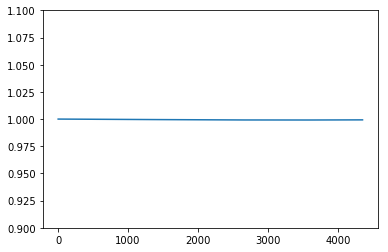

In [9]:
#plot of maximally precise distance between sun and earth
plt.plot(time,rlist)
plt.plot()
plt.ylim(0.9, 1.1)

Questions:
   1. for the very large parameters do we introduce randomness only in the decimal places? or starting from say, 10**25?? That is, do we add randomness immedately after the digits we have measured??
    2. do we make each paramenter and variable have its own wordly digit? or does everything have the same "resolution". If everything has the same worldly digit that would be easier to automate. 
    3. we could also consiter ALSO randomizing the "level" of worldliness for each parameter
    4. how do we know what the worldliness of the output is? 

#comparing vy with and without randomness 

with open("vy_indet.txt",'r') as f:
    for count, line in enumerate(f, start=1):
        if count % 3 == 0 :
            print(line)
       



How could we make this function better: 
   1. use the https://www.nist.gov/programs-projects/nist-randomness-beacon to create "real" randomness 
   2. get more decimal places 
   3. allow it to truncate either decimal places or non decimal digits -->this may be a lil tricky because we would have to round. Are you ok with that? 

How to implement with the simulation:
   1. call the indet function at each time step
   
Legend for the image witht escape:
1. green: dw=10, blue: dw=12, pink: dw=19, black: precise
   
 

with open('earth.txt', 'r') as f:
    for count, line in enumerate(f, start=0):
        if count % 2 == 0:
            print(line)

h = open("earth.txt",'r')
lines = h.readlines()



for line in lines:
    line = line.strip()
    column = line.split()
    x = column [0]
    y = column [1]
    print(x,y)